In [7]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as pyplot

In [2]:
transform = transforms.ToTensor()
mnist_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

In [3]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), 
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(), 
            nn.Linear(12, 3)
        )

        self.decoder = nn.Sequential(
            nn.Linear(3, 12), 
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(), 
            nn.Linear(128, 28*28), 
            nn.Sigmoid()
        )


    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [4]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [5]:
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for(img, _) in data_loader:
        img = img.reshape(-1, 28*28)
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch:{epoch+1}, Loss:{loss.item(): .4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss: 0.0553
Epoch:2, Loss: 0.0419
Epoch:3, Loss: 0.0403
Epoch:4, Loss: 0.0382
Epoch:5, Loss: 0.0416
Epoch:6, Loss: 0.0346
Epoch:7, Loss: 0.0367
Epoch:8, Loss: 0.0344
Epoch:9, Loss: 0.0397
Epoch:10, Loss: 0.0348


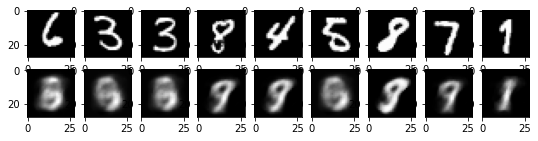

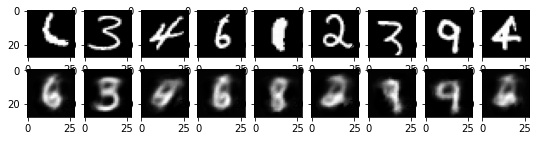

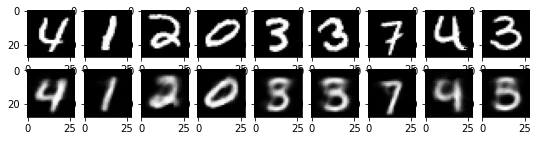

In [9]:
for k in range (0, num_epochs, 4):
    pyplot.figure(figsize=(9, 2))
    pyplot.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        pyplot.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28)
        pyplot.imshow(item[0])
    
    for i, item in enumerate(recon):
        if i >= 9: break
        pyplot.subplot(2, 9, 9+i+1)
        item = item.reshape(-1, 28,28)
        pyplot.imshow(item[0])